In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
%cd /home/scoops/git/Riley_Fork/pyecca/notebooks/BA/
%pwd

/home/scoops/git/Riley_Fork/pyecca/notebooks/BA


'/home/scoops/git/Riley_Fork/pyecca/notebooks/BA'

In [3]:
# img1 = cv.imread('IMG_3939.JPG',cv.IMREAD_COLOR)          # queryImage
# img2 = cv.imread('IMG_3940.JPG',cv.IMREAD_COLOR)          # trainImage
# img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
# img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

img1 = cv.imread('IMG_3939.JPG',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('IMG_3940.JPG',cv.IMREAD_GRAYSCALE)          # trainImage

In [4]:
img1 = cv.imread('DEPTH_IMAGE0.PNG',cv.IMREAD_COLOR)          # queryImage
img2 = cv.imread('DEPTH_IMAGE1.PNG',cv.IMREAD_COLOR)          # trainImage
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# img1 = cv.imread('DEPTH_IMAGE0.PNG',cv.IMREAD_GRAYSCALE)          # queryImage
# img2 = cv.imread('DEPTH_IMAGE1.PNG',cv.IMREAD_GRAYSCALE)          # trainImage

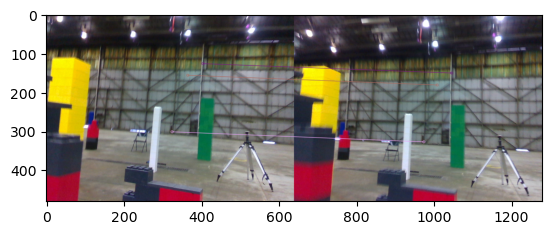

(<matplotlib.image.AxesImage at 0x7f78b7984bb0>, None)

In [5]:
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good_m = []
good_n = []
for m,n in matches:
    if m.distance < 0.115*n.distance:     # Lower the coefficient the "pickier" the match confidence
        good_m.append([m])
        good_n.append([n])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good_m,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [6]:
len(good_m) == len(good_n)
len(good_m)

3

In [7]:
# Loop through all good points and store their x and y pixel location   
# Initialize lists
list_kp1 = []
list_kp2 = []

# For each match...
for lcv, mat in enumerate(good_m):

    # Get the matching keypoints for each of the images
    img1_idx = mat[0].queryIdx
    img2_idx = mat[0].trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1, y1) = kp1[img1_idx].pt
    (x2, y2) = kp2[img2_idx].pt

    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))

print("Pixel locations for \"good\" matches for both images:")
print("list_kp1", list_kp1)
print("list_kp2", list_kp2)

Pixel locations for "good" matches for both images:
list_kp1 [(324.9621887207031, 300.9515380859375), (365.5688781738281, 154.9756317138672), (404.2901916503906, 125.07554626464844)]
list_kp2 [(334.6021728515625, 326.9213562011719), (369.105712890625, 180.19703674316406), (406.283203125, 149.23768615722656)]


In [8]:
# Ignore the rest of this. Was trying to import pointcloud data manually.

import re
re.findall(r'\d+', "hello 42 I'm a 32 string 30")

txt_content = []
int_content = []
with open('Depth_Points0.txt') as file:
    for lcv, line in enumerate(file):
        if lcv >= 40 and lcv <= 2411299:
            txt_content.append(line)
            int_str = re.findall(r'\d+', line)
            int_content.append(int(int_str[0]))
            

In [9]:
len(txt_content)
txt_content[2]

'    120,\n'

In [105]:
int_content[2]

120